# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with a data preprocessing and feature engineering step. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Conduct data preprocessing and feature engineering by 
    - removing missing values using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html);
    - normalizing/scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - handling imbalanced classes using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html);
    - and reducing the dimensionality of the dataset using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

In [3]:
import pandas as pd 
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
from sklearn.model_selection import train_test_split
import numpy as np
X = df.drop(columns="workclass")
y = df["fnlwgt"]
X.head
X_train,X_test,y_train,y_test = train_test_split(X,y)
#printing out the train test split 
print("X_train:")
print(X_train.head)
print("X_test:")
print(X_test.head)
print("y_train:")
print(y_train.head)
print("y_test")
print(y_test.head)


X_train:
<bound method NDFrame.head of        age  fnlwgt      education  education-num       marital-status  \
22546   45  102559      Assoc-voc             11   Married-civ-spouse   
25852   36   67728      Bachelors             13   Married-civ-spouse   
28646   41  193459   Some-college             10   Married-civ-spouse   
29999   36  348960        HS-grad              9        Never-married   
19664   52  343440   Some-college             10   Married-civ-spouse   
...    ...     ...            ...            ...                  ...   
525     28   85812   Some-college             10   Married-civ-spouse   
11518   44   65145        HS-grad              9   Married-civ-spouse   
29425   62  138621      Assoc-voc             11            Separated   
24706   37   38948        HS-grad              9   Married-civ-spouse   
24236   37   49626      Assoc-voc             11   Married-civ-spouse   

              occupation    relationship    race      sex  capital-gain  \
22546    

In [29]:
df = df.replace('', np.nan)
print(df)
df.dropna(axis=0)

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [37]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
df = pd.read_csv("adult.csv")
print(df)
df.head(10)
df.info()

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [41]:
#label_encoder object 
label_encoder =LabelEncoder()
# Encode labels in column. 
df['workclass']= label_encoder.fit_transform(df['workclass'])
df.head(10)



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,7,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,4,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,4,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,4,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,4,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,4,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,6,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,4,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,4,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [55]:
from sklearn.preprocessing import Normalizer
X = [[13,13,9,7,13,14,5,9,14,13]]
transformer = Normalizer().fit(X)  # fit does nothing.
Normalizer()
transformer.transform(X)


array([[0.3600017 , 0.3600017 , 0.24923195, 0.19384707, 0.3600017 ,
        0.38769414, 0.13846219, 0.24923195, 0.38769414, 0.3600017 ]])

In [58]:
#imbalance test 
import pandas as pd 
df = pd.read_csv("adult.csv")
print(df)


       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [61]:
X = df.drop(columns="education")
y = df["education"]
education_count = y.value_counts()
print(education_count)

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


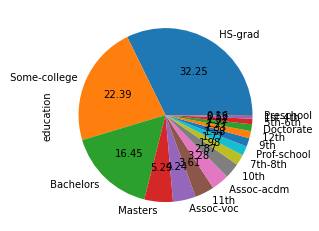

In [62]:
y.value_counts().plot.pie(autopct='%.2f')


In [63]:
#reducing dimensionality 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [67]:
df = pd.read_csv("adult.csv")
print(df)


       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [70]:
encoder = LabelEncoder()
# Now apply the transformation to all the columns:
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

In [72]:
X_features = df.iloc[:,1:23]
y_label = df.iloc[:, 0]


In [73]:
# Scale the features
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

In [74]:
# Visualize
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

In [82]:
#train and test a SVM
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [91]:
df = pd.read_csv("adult.csv")
print(df)
print(df.head(5))



       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [93]:
# Dropping missing records
df = df.dropna()
print(len(df))
print(df)

32561
       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-c

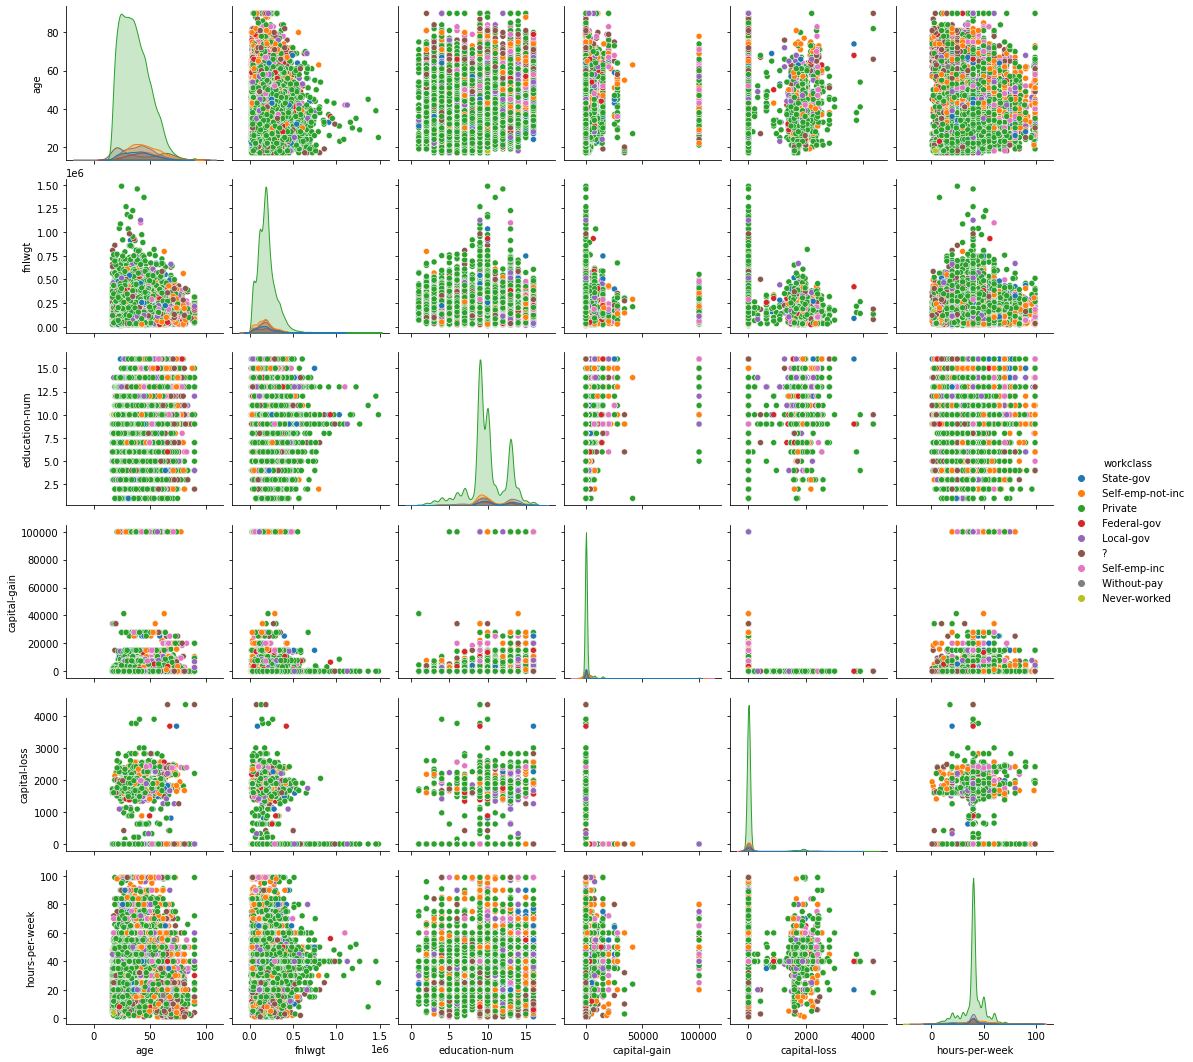

In [94]:
# Plotting our workclass  features
pairplot(df, hue='workclass')
plt.show()

In [98]:
# Splitting our data
X = df[['age', 'hours-per-week']]
y = df['education']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

       age  hours-per-week
28865   47              50
8368    31              40
23400   43              25
23199   20              32
19063   41              15
       age  hours-per-week
27144   27              45
11743   24              38
4306    30              40
19590   20              40
24990   54              55
28865        Bachelors
8368         Bachelors
23400          7th-8th
23199          HS-grad
19063     Some-college
Name: education, dtype: object
27144             12th
11743          HS-grad
4306           HS-grad
19590     Some-college
24990     Some-college
Name: education, dtype: object
